# Financial Inclusion in Africa

![Alt text](data/Fin.png)

#### Importing the necessary libraries for EDA and ML Part

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler, 
    PolynomialFeatures,
    KBinsDiscretizer
)
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

Performing EDA Since on Train.csv we are working with Train.csv

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [4]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [5]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [6]:
# Frequency table of a variable will give us the count of each category in that Target variable.
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [7]:
#Check statistical values for fields with other than numerical datatype
train.describe(exclude=np.number).T

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_1,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [8]:
#checking null values
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:

# Checking unique values for all columns
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Unique values in {column} column:")
    print(unique_values)
    print()

Unique values in country column:
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']

Unique values in year column:
[2018 2016 2017]

Unique values in uniqueid column:
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']

Unique values in bank_account column:
['Yes' 'No']

Unique values in location_type column:
['Rural' 'Urban']

Unique values in cellphone_access column:
['Yes' 'No']

Unique values in household_size column:
[ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]

Unique values in age_of_respondent column:
[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]

Unique values in gender_of_respondent column:
['Female' 'Male']

Unique values in relations

In [10]:
# Check for duplicate values in all columns
duplicate_rows = train[train.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [country, year, uniqueid, bank_account, location_type, cellphone_access, household_size, age_of_respondent, gender_of_respondent, relationship_with_head, marital_status, education_level, job_type]
Index: []


From the above duplicate check, we can identify that no columns are duplicated. Apparently Unique IDs are repeated based on country.

### 3. Visualise the dataset

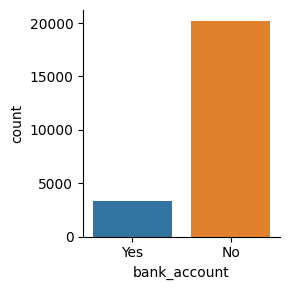

In [11]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train, height=3, aspect=1)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Kenya'),
  Text(1, 0, 'Rwanda'),
  Text(2, 0, 'Tanzania'),
  Text(3, 0, 'Uganda')])

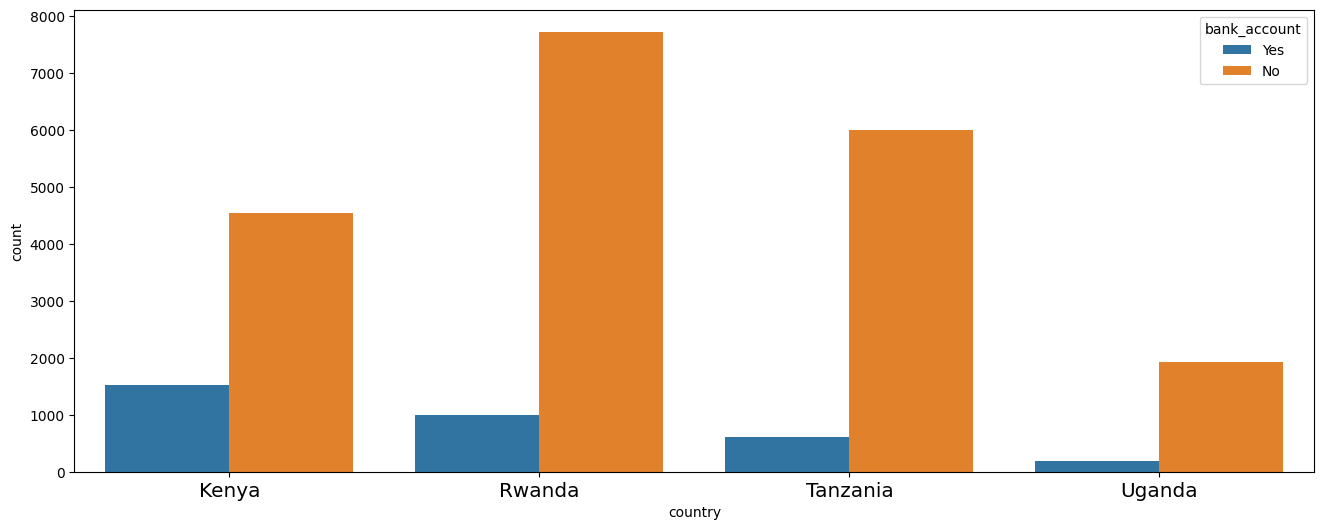

In [12]:
#Explore country vs bank account 
plt.figure(figsize=(16, 6))
sns.countplot(x='country', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2]),
 [Text(0, 0, '2016'), Text(1, 0, '2017'), Text(2, 0, '2018')])

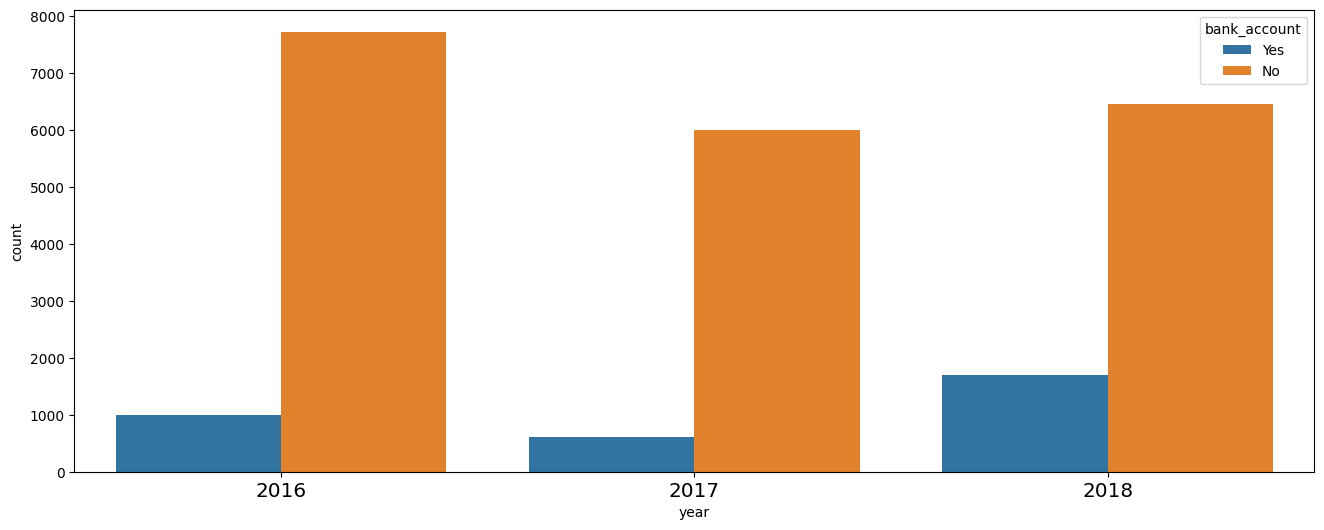

In [13]:
# Explore Location vstarget distribution 

plt.figure(figsize=(16, 6))
sns.countplot(x='year', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

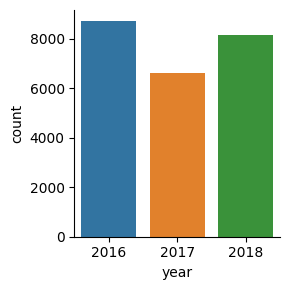

In [14]:
# Explore cellphone_access distribution 

sns.catplot(x="year", kind="count", data=train, height=3, aspect=1)

From the above plots: year vs target distribution and year distribution plots gives us an idea that most of the data was collected in 2016.

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

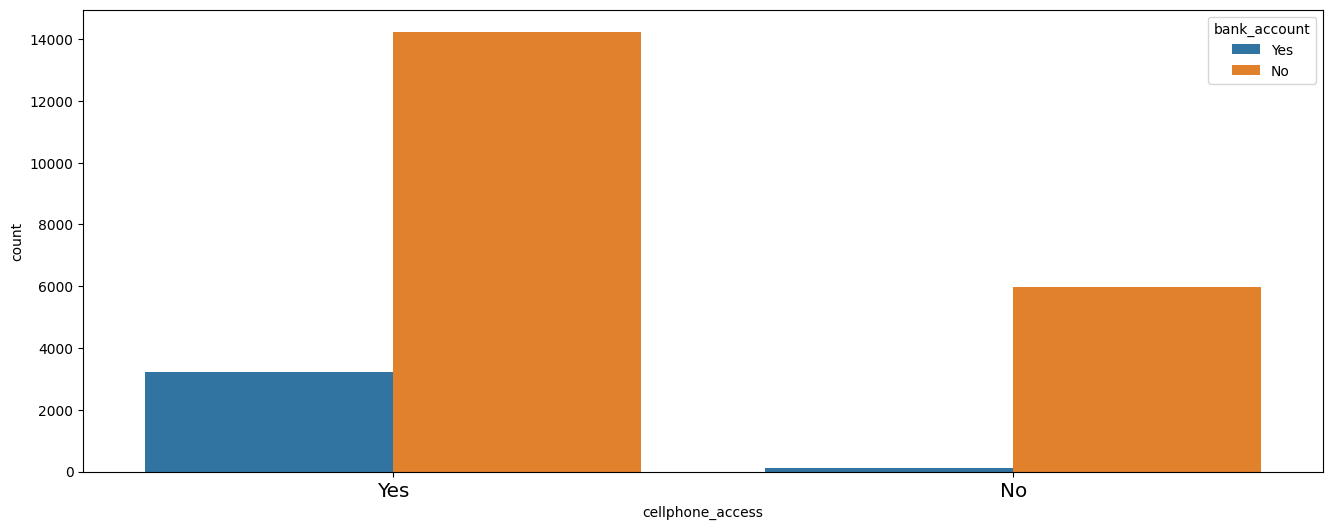

In [15]:
# Explore cellphone_access vs target distribution 

plt.figure(figsize=(16, 6))
sns.countplot(x='cellphone_access', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

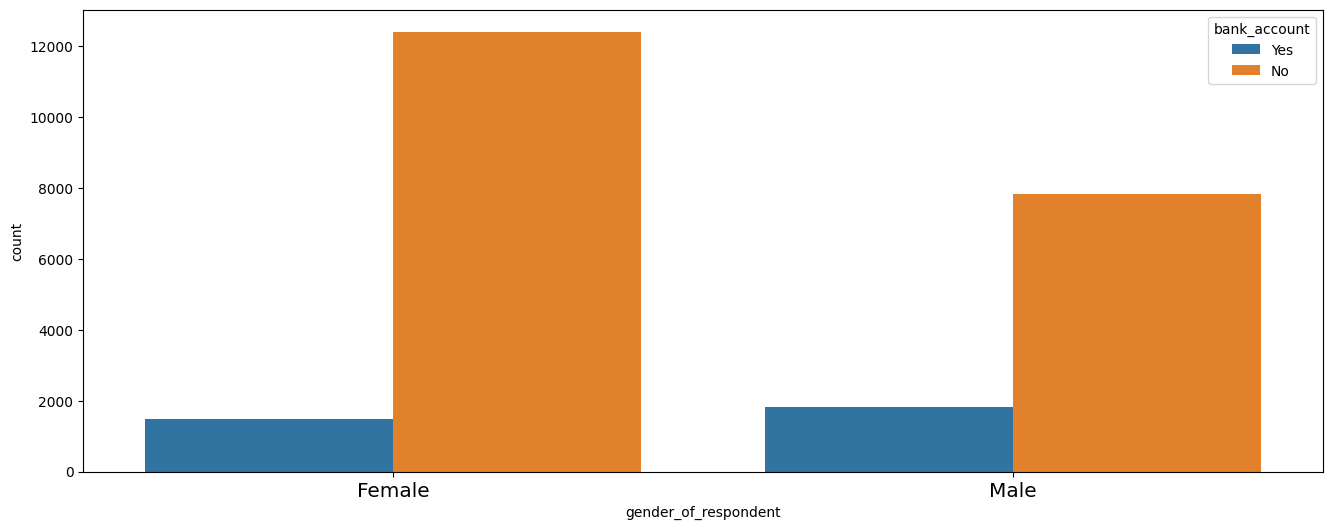

In [16]:
# Explore gender_of_respondents vs target distribution 

plt.figure(figsize=(16, 6))
sns.countplot(x='gender_of_respondent', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

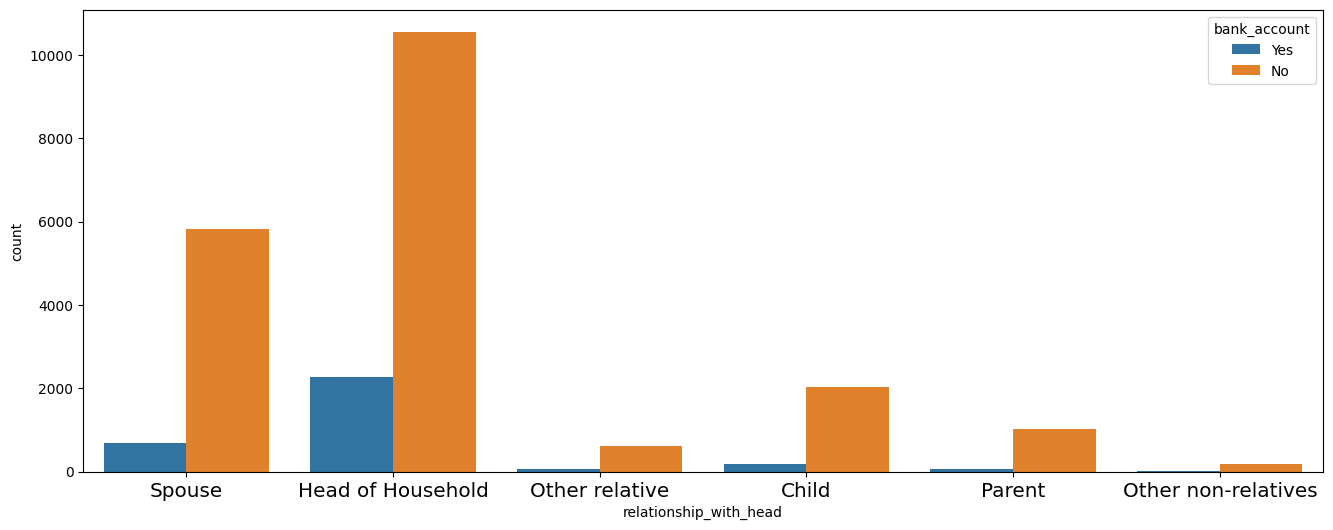

In [17]:
# Explore relationship_with_head vs target distribution 

plt.figure(figsize=(16, 6))
sns.countplot(x='relationship_with_head', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

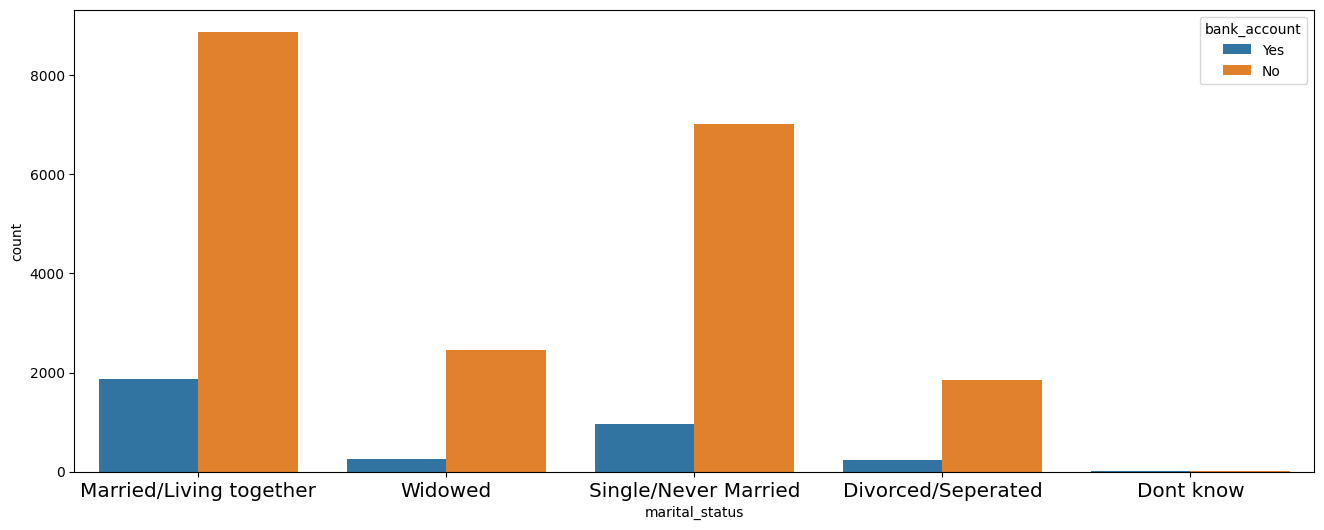

In [18]:
# Explore marital_status vs target  distribution 

plt.figure(figsize=(16, 6))
sns.countplot(x='marital_status', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

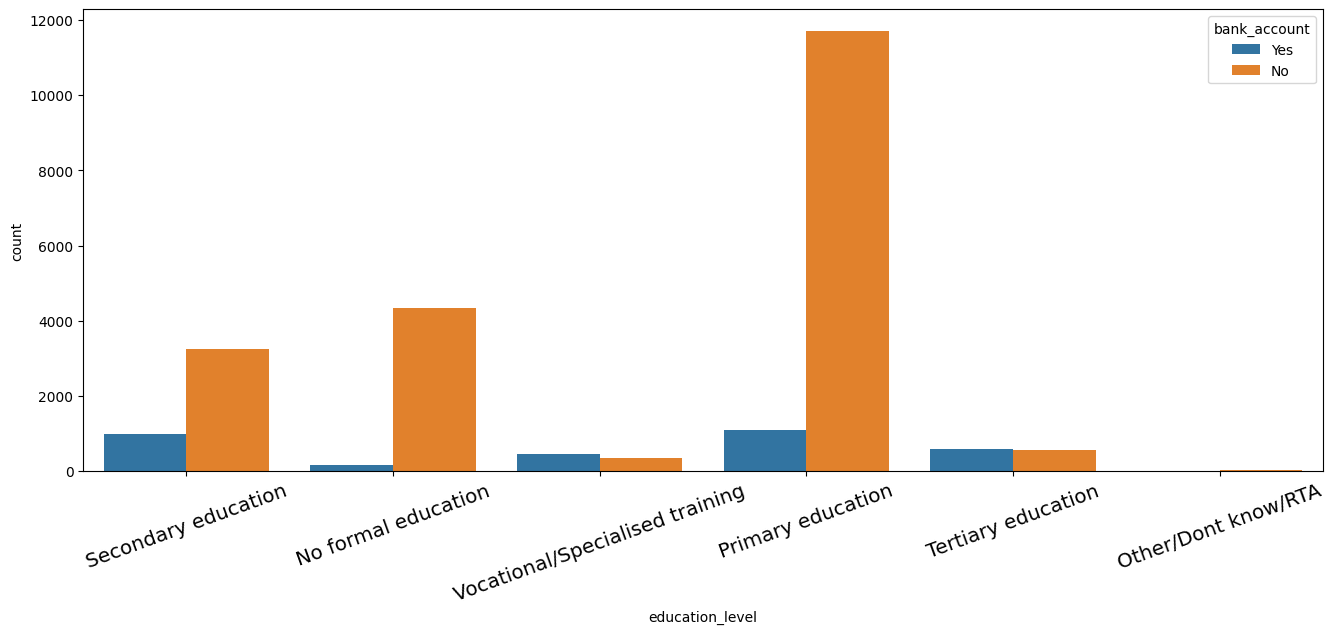

In [19]:
# Explore education_level vs target distribution 

plt.figure(figsize=(16, 6))
sns.countplot(x='education_level', hue= 'bank_account', data=train)
plt.xticks(
    rotation=20,
    fontweight='light',
    fontsize='x-large'
    
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

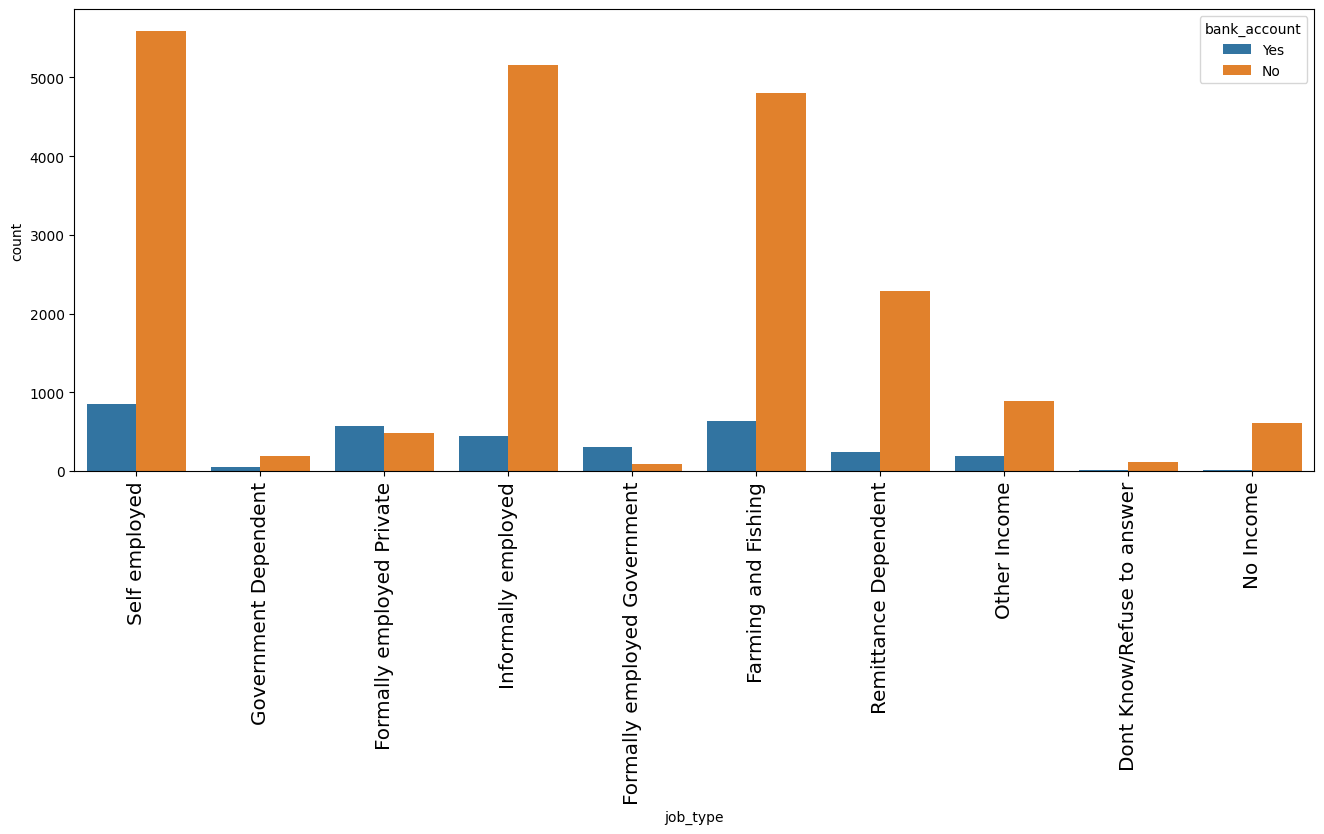

In [20]:
# Explore job_type vs target distribution 


plt.figure(figsize=(16, 6))
sns.countplot(x='job_type', hue= 'bank_account', data=train)
plt.xticks(
    rotation=90,
    fontweight='light',
    fontsize='x-large'
    
)

Text(0.5, 0, 'Household  size')

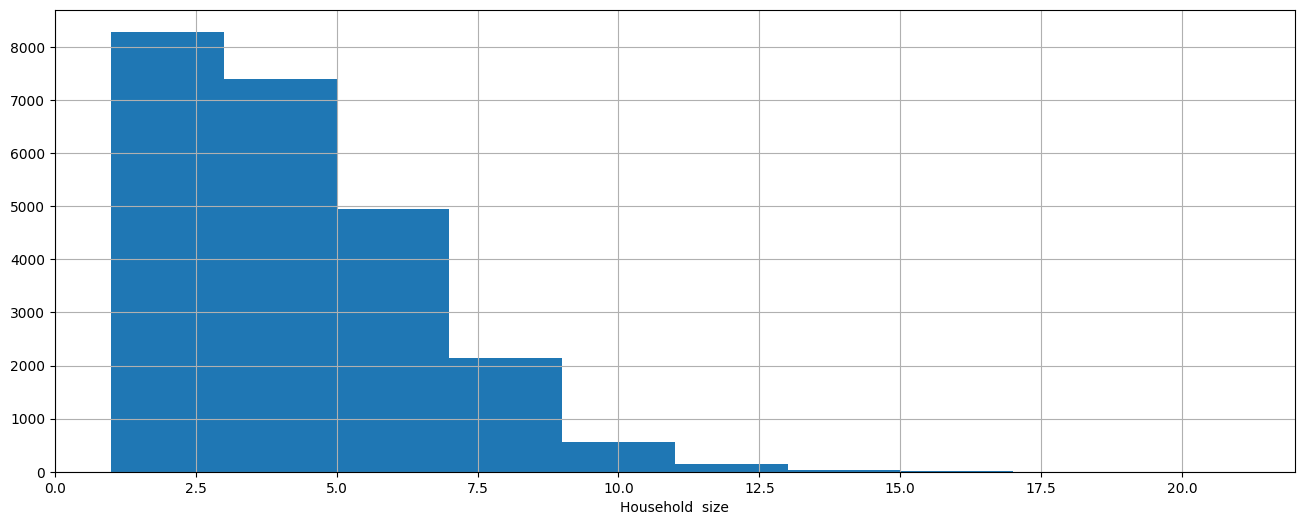

In [21]:
# Explore household_size distribution 

plt.figure(figsize=(16, 6))
train.household_size.hist() 
plt.xlabel('Household  size')

Text(0.5, 0, 'Age of Respondent')

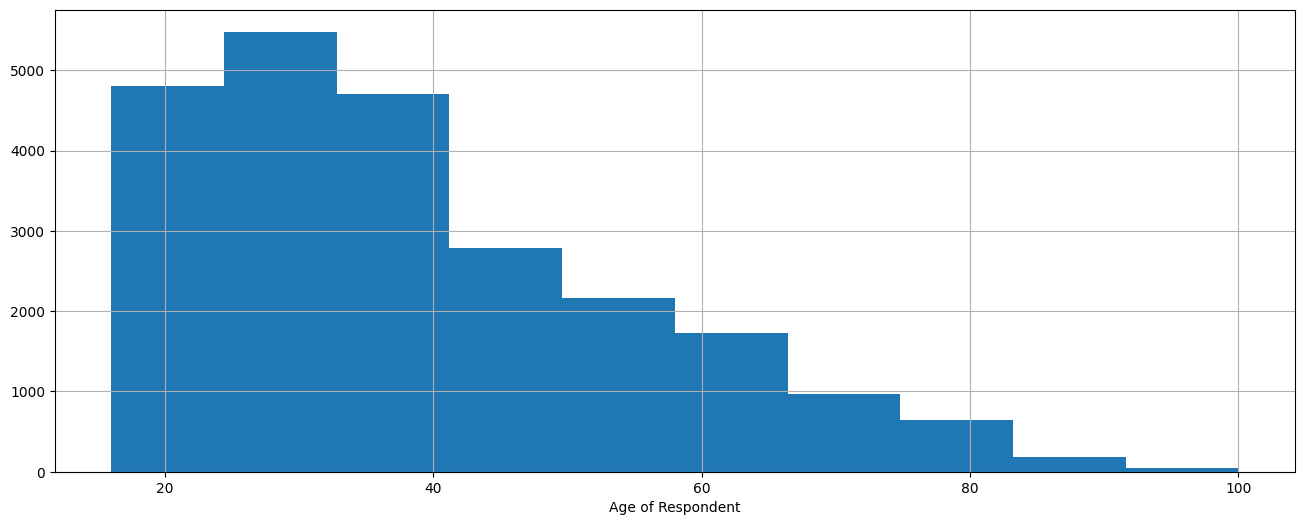

In [22]:
# Explore age_of_respondent distribution 
plt.figure(figsize=(16, 6))
train.age_of_respondent.hist() 
plt.xlabel('Age of Respondent')

From the above visualisations the following details can be found:<br>
    1. Most data is collected in the year 2016<br>
    2. Self employed, Informally employed and Remittance dependent groups tend to impact target.<br>
    3. Education is not having much impact on target.<br>
    4. Marriage status directly impacts the target.<br>
    5. In aspect of relationship with head, head of household tends to impact target.<br>
    6. Cell phone access also impacts target variable  <br> 

### Data Preprocessing

In [23]:
fina_ran = pd.read_csv('data/Train.csv')
fina_ran.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [24]:
#dropping country, year, uniqueid, relationship_with_head columns since its not relevant for the modelling.

finan_ran = fina_ran.drop(['country','year','uniqueid','relationship_with_head'], axis=1)

In [25]:
#Using label encoder for labelling the categorical columns 

le = LabelEncoder()
finan_ran['bank_account'] = le.fit_transform(finan_ran['bank_account'])

#defining X and y

X = finan_ran.drop('bank_account', axis=1)
y = finan_ran['bank_account']

In [26]:
#Splitting the data into test and train

X_train, X_test,y_train, y_test = train_test_split(X,y , test_size= 0.20, random_state=42, stratify=y)

In [27]:
#defining the numerical and categorical features.

num_features = list(X_train.select_dtypes(exclude=['object']).columns)
cat_features = list(X_train.select_dtypes(include=['object']).columns)

#defining transformers.

num_transformer = ImbPipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaling', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3))
    ])
cat_transformer = ImbPipeline(steps=
                           [
        ('imputer', SimpleImputer(strategy='most_frequent')),
    
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

#defining preprocessor.

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_features),
        ('cat_transformer', cat_transformer, cat_features)
        
    ],remainder='passthrough')

In [31]:
#creating a pipeline for classification using imbalanced data

# Random forest 
baseline_ran_ = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('Smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1, verbose = 1))
         
         ])


# KNN Model

baseline_knn = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('Smote', SMOTE(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors =5 ,metric='manhattan'))  # knn classifier
    ]
)

#### Testing baseline models

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Test-------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4043
           1       0.48      0.44      0.46       662

    accuracy                           0.85      4705
   macro avg       0.69      0.68      0.69      4705
weighted avg       0.85      0.85      0.85      4705

Accuracy score: 0.8541976620616366


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Confusion Matrix')

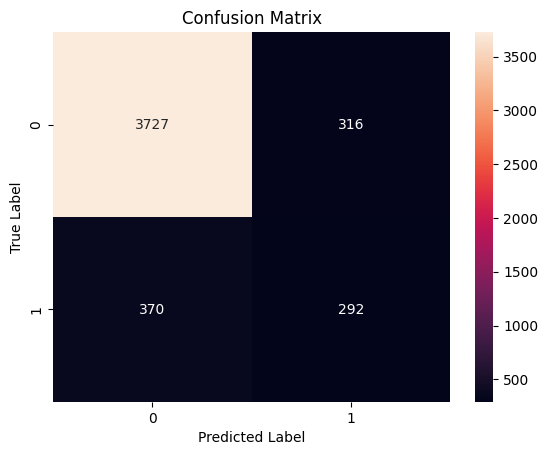

In [29]:
#random forest baseline model

baseline_ran_.fit(X_train, y_train)

y_ran= baseline_ran_.predict(X_test)

#printing the classification report

print('Test-------------------')
print(classification_report(y_test, y_ran))
print('Accuracy score:', accuracy_score(y_test, y_ran))

#plotting the consufion matrix

cm=confusion_matrix(y_test, y_ran)
sns.heatmap(cm, annot=True, fmt ='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

Test-------------------
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4043
           1       0.34      0.54      0.42       662

    accuracy                           0.79      4705
   macro avg       0.63      0.68      0.64      4705
weighted avg       0.84      0.79      0.80      4705



Text(0.5, 1.0, 'Confusion Matrix')

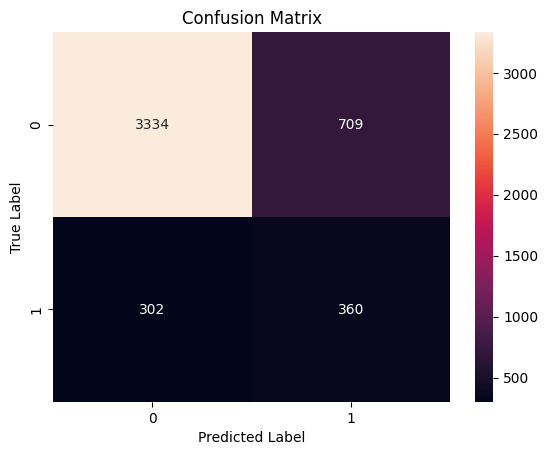

In [32]:
#knn baseline model

baseline_knn.fit(X_train, y_train)
y_knn_test = baseline_knn.predict(X_test)
print('Test-------------------')
print(classification_report(y_test, y_knn_test))
cm=confusion_matrix(y_test, y_knn_test)
sns.heatmap(cm, annot=True, fmt ='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [ ]:
#defining parametres grid

param_grid = {
    'classifier__n_estimators': np.linspace(10, 200).astype(int),
    'classifier__max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'classifier__max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'classifier__max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__bootstrap': [True, False]
}

#fitting randomized search cross validation, using recall as scoring because its more relavant to the problem

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(baseline_ran_, param_grid, n_jobs=-1, 
                        scoring='recall', cv=3, 
                        n_iter=10, verbose=5, random_state=42)

rs.fit(X_train, y_train)

In [ ]:
#displaying the best paramentres

rs.best_params_

In [ ]:
#defining the best model

best_model = rs.best_estimator_

In [ ]:
#fitting the best model

best_model.fit(X_train, y_train)

In [ ]:
#making predictions on the test set

rf_predictions = best_model.predict(X_test)

In [ ]:
#printing the classification report and recall score

print(classification_report(y_test, rf_predictions))
print(accuracy_score(y_test, rf_predictions))

In [ ]:
#making predcitions on the train set

rf_train = best_model.predict(X_train)

In [ ]:
#displaying the classification report on y_train

print(classification_report(y_train, rf_train))

In [ ]:
#plotting the consufion matrix

cm_=confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_, annot=True, fmt ='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')